This notebook plots the $(x, y, z)$ components of a lithium ion from the unprocessed Li<sub>6</sub>PS<sub>5</sub>Cl simulation trajectory alongside the corresponding coordinates from the &ldquo;inherent structure&rdquo; trajectory.

In [1]:
from pymatgen.io.vasp import Xdatcar

import numpy as np
import yaml

import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [2]:
from matplotlib import rcParams

rcParams['font.serif'] = "Iowan Old Style"
rcParams['font.family'] = "serif"

rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Iowan Old Style'
rcParams['mathtext.it'] = 'Iowan Old Style:italic'
rcParams['mathtext.bf'] = 'Iowan Old Style:bold'


rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams.update({'font.size': 16})
rcParams['text.usetex']=False

In [3]:
import sys
sys.path.insert(0, "../../scripts/")
from utils import flatten_list

In [4]:
with open('../md_runs.yaml') as f:
    md_data = yaml.safe_load(f)
print(md_data)

{'Li6PS5I': {'0p': [1, 2, 3, 4, 5, 6], '50p': [1, 2, 3, 4, 5, 6, 7], '100p': [1, 2, 3, 4, 5, 6, 7]}, 'Li6PS5Cl': {'0p': [1, 2, 3, 4, 5], '50p': [1, 2, 3, 4, 5, 6], '100p': [1, 2, 3, 4, 5, 6]}}


In [5]:
def structures_from_xdatcars(filenames):
    xdatcars = [Xdatcar(f) for f in filenames]
    structures = flatten_list([xd.structures for xd in xdatcars])
    return structures

In [22]:
def y_ticks(data):
    return np.arange(int(data.min()+1), int(data.max())+1)

In [32]:
data_dir = '../../data'
system = 'Li6PS5I'
disorder = '0p'

runs = md_data[system][disorder]
xdatcar_dir = f'{data_dir}/{system}/{disorder}'

inherent_structures = structures_from_xdatcars([f'{xdatcar_dir}/run{i}/inherent_XDATCAR.gz'
                                                for i in runs])
actual_structures = structures_from_xdatcars([f'{xdatcar_dir}/run{i}/actual_XDATCAR.gz'
                                                for i in runs])

In [33]:
atom_number = 2
r_inherent = np.array([s[atom_number].coords for s in inherent_structures])
r_actual = np.array([s[atom_number].coords for s in actual_structures])

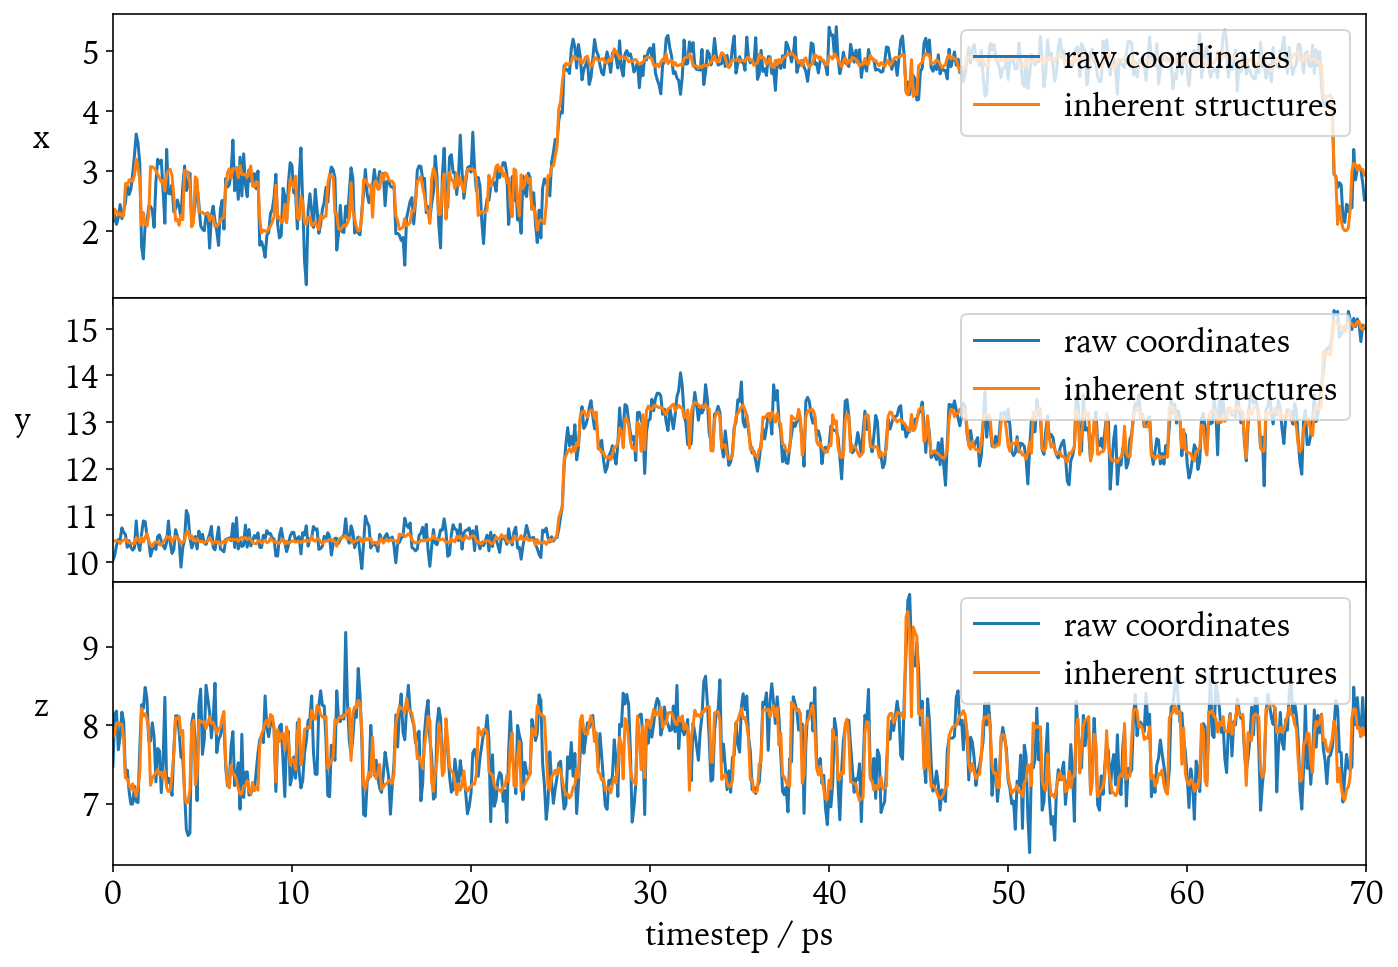

In [34]:
fig, ax = plt.subplots(3,1, figsize=(10,7), sharex=True)
plt.subplots_adjust(hspace=0)

dt = np.arange(r_actual.shape[0])/10

ax[0].plot(dt, r_actual[:,0], label='raw coordinates')
ax[0].plot(dt, r_inherent[:,0], label='inherent structures')
ax[0].legend(loc='upper right')
ax[0].set_ylabel(r'$x$', rotation=0, labelpad=20)
ax[0].set_xlim([0,70])
ax[0].set_yticks(y_ticks(r_actual[:,0])) 

ax[1].plot(dt, r_actual[:,1], label='raw coordinates')
ax[1].plot(dt, r_inherent[:,1], label='inherent structures')
ax[1].legend(loc='upper right')
ax[1].set_ylabel(r'$y$', rotation=0, labelpad=20)
ax[1].set_xlim([0,70])
ax[1].set_yticks(y_ticks(r_actual[:,1])) 

ax[2].plot(dt, r_actual[:,2], label='raw coordinates')
ax[2].plot(dt, r_inherent[:,2], label='inherent structures')
ax[2].legend(loc='upper right')
ax[2].set_ylabel(r'$z$', rotation=0, labelpad=20)
ax[2].set_xlabel(r'timestep / ps')
ax[2].set_xlim([0,70])
ax[2].set_yticks(y_ticks(r_actual[:,2])) 

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

plt.show()

In [35]:
data_dir = '../../data'
system = 'Li6PS5Cl'
disorder = '50p'

runs = md_data[system][disorder]
xdatcar_dir = f'{data_dir}/{system}/{disorder}'

inherent_structures = structures_from_xdatcars([f'{xdatcar_dir}/run{i}/inherent_XDATCAR.gz'
                                                for i in runs])
actual_structures = structures_from_xdatcars([f'{xdatcar_dir}/run{i}/actual_XDATCAR.gz'
                                                for i in runs])

In [36]:
atom_number = 57
r_inherent = np.array([s[atom_number].coords for s in inherent_structures])
r_actual = np.array([s[atom_number].coords for s in actual_structures])

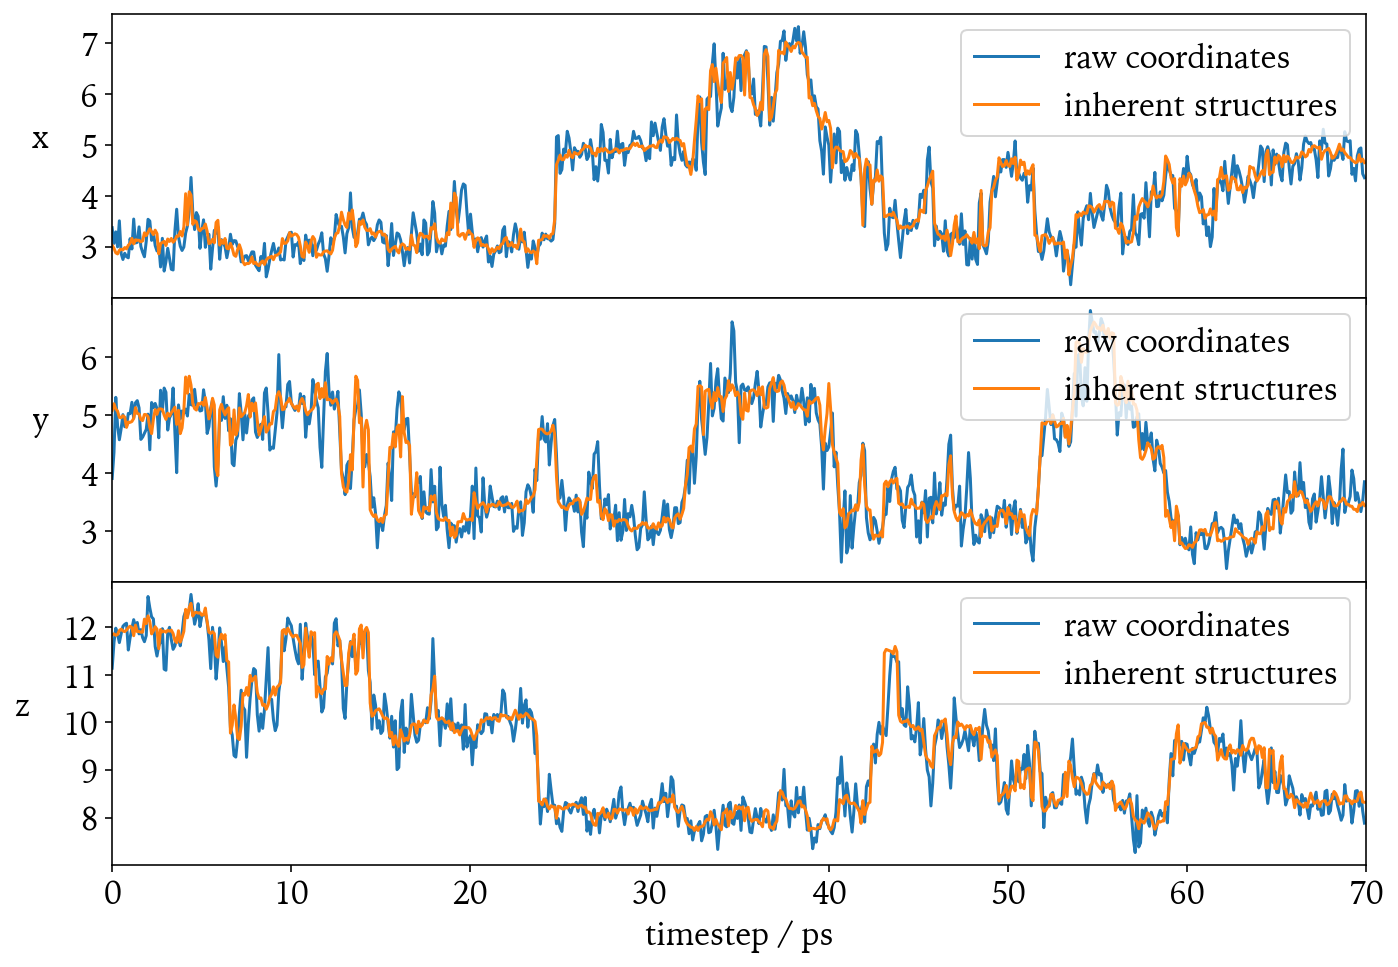

In [37]:
fig, ax = plt.subplots(3,1, figsize=(10,7), sharex=True)
plt.subplots_adjust(hspace=0)

dt = np.arange(r_actual.shape[0])/10

ax[0].plot(dt, r_actual[:,0], label='raw coordinates')
ax[0].plot(dt, r_inherent[:,0], label='inherent structures')
ax[0].legend(loc='upper right')
ax[0].set_ylabel(r'$x$', rotation=0, labelpad=20)
ax[0].set_xlim([0,70])
ax[0].set_yticks(y_ticks(r_actual[:,0])) 

ax[1].plot(dt, r_actual[:,1], label='raw coordinates')
ax[1].plot(dt, r_inherent[:,1], label='inherent structures')
ax[1].legend(loc='upper right')
ax[1].set_ylabel(r'$y$', rotation=0, labelpad=20)
ax[1].set_xlim([0,70])
ax[1].set_yticks(y_ticks(r_actual[:,1])) 

ax[2].plot(dt, r_actual[:,2], label='raw coordinates')
ax[2].plot(dt, r_inherent[:,2], label='inherent structures')
ax[2].legend(loc='upper right')
ax[2].set_ylabel(r'$z$', rotation=0, labelpad=20)
ax[2].set_xlabel(r'timestep / ps')
ax[2].set_xlim([0,70])
ax[2].set_yticks(y_ticks(r_actual[:,2])) 

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig('../../figures/raw_versus_inherent_trajectory.pdf')
plt.show()

In [12]:
%load_ext version_information

%version_information yaml, pymatgen, numpy, matplotlib

Software versions
Python 3.7.7 64bit [Clang 11.0.3 (clang-1103.0.32.62)]
IPython 7.19.0
OS Darwin 19.6.0 x86_64 i386 64bit
yaml 5.3.1
pymatgen 2020.11.11
numpy 1.19.4
matplotlib 3.3.3
Sat Dec 12 20:21:11 2020 GMT